# Семинар 2
# SVD и приложения

### Свойство матрицы Хаусхолдера

Преобразование Хаусхолдера может занулить все элементы в столбце матрицы, кроме первого:

$$
    H \begin{bmatrix} \times \\ \times \\ \times \\ \times  \end{bmatrix} = 
      \begin{bmatrix} \times \\ 0 \\ 0 \\ 0  \end{bmatrix}.
$$

**Доказательство** Пусть $e_1 = (1,0,\dots, 0)^T$, тогда нам надо найти такой вектор $v$ что

$$
   H x = x - 2(v^* x) v = \alpha e_1,
$$

где $\alpha$ неизвестная константа. В силу унитарной инвариантности $\|\cdot\|_2$ мы получим

$$\|x\|_2 = \|Hx\|_2 = \|\alpha e_1\|_2 = |\alpha|.$$

и

$$\alpha = \pm \|x\|_2$$

Также, можем выразим $v$ из равенства $x - 2(v^* x) v = \alpha e_1$:

$$v = \dfrac{x-\alpha e_1}{2 v^* x}$$

Умножив последнее выражение на $x^*$ получим

$$
    x^* x - 2 (v^* x) x^* v = \alpha x_1;
$$
$$
    \|x\|_2^2 - 2 (v^* x)^2 = \alpha x_1
$$
$$
    (v^* x)^2 = \frac{\|x\|_2^2 - \alpha x_1}{2}.
$$

Итак, $v$ существует и равна
$$
    v = \dfrac{x \pm \|x\|_2 e_1}{2v^* x} = \dfrac{x \pm \|x\|_2 e_1}{\pm\sqrt{2(\|x\|_2^2 \mp \|x\|_2 x_1)}}.
$$

### Унитарная инвариантность фробениусовой и спектральной нормы матрицы

1. Покажем, что $\|AU\|_F = \|UA\|_F = \|A\|_F$, где $U$ – унитарная матрица
2. Покажем, что $\|AU\|_2 = \|UA\|_2 = \|A\|_2$, где $U$ – унитарная матрица

## Напоминание

- Любую матрицу можно представить в виде 

$$A = U\Sigma V^*,$$

где $U$ и $V$ – унитарны, а $\Sigma$ – диагональная с неотрицательными числами на диагонали, которые называются сингулярными числами


### Приложение 1: тематическое моделирование и латентный семантический поиск

- Дан набор документов
- Необходимо разбить его на темы
- Модель мешка слов
- Для обеих задач нужно некоторое вложение документов в $\mathbb{R}^n$

### Модель мешка слов ("bag-of-words")

- Документ – это набор слов, порядок которых неважен
- Тема – это набор слов, наиболее характерных для неё

### Матрица документов-слов $A$

- Матрица размера $N_{docs} \times N_{terms}$
- Чем её заполнить?

### Возможные варианты

- Элемент $(i, j)$ – число вхождений слова $j$ в документ $i$
- Элемент $(i, j)$ - tf-idf для слова $j$ и документа $i$

Tf-Idf – произведение 

- tf = частота встречаемости слова в документе и 

- idf = $\log \frac{|D|}{|\{ d \in D \mid t \in D \}|}$, то есть логарифм отношения числа всех документов к числу документов, в которых есть слово, для которого вычисляется tf-idf. 

**Q:** какими свойствами будет обладать матрица $A$?

## Как из SVD получить требуемое вложение?

- Пусть дана матрица $A$
- Для получения вложений в $\mathbb{R}^n$ вычислим SVD для некоторого ранга $d$: $A = U\Sigma V^*$
- Матрица $U$ размера $N_{docs} \times d$, то есть каждый документ описывается некоторым вектором в $\mathbb{R}^d$
- Матрица $V$ размера $N_{terms} \times d$, то есть каждое слово также описывается некоторым вектором в $\mathbb{R}^d$ 

## Другая интерпретация

- Если ранг $d$ – это число тем в коллекции документов, то получаем некоторое распределение слов по темам и документов по темам
- Можно получить самые релевантные слова для каждой темы и самые характерные документы
- Также эти вложения можно использовать как входные данные для более продвинутых алгоритмов кластеризации/классификации
- Подробности будут освещены в курсе про машинное обучение

### Давайте посмотрим, как это всё работает!

In [17]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.sparse.linalg as spsplin
import scipy.sparse as spsp

### Загрузим данные

In [18]:
documents = []
with open("./test_articles.txt","r") as fin:
    for line in fin.readlines():
        text = line.strip()
        documents.append(text)
print("Total number of Documents:",len(documents))

Total number of Documents: 4551


### Пример документа

In [21]:
documents[20]

'When I got my Top of the Pops break, Mum got me new pyjamas My father was sitting by the fire, with a transistor radio in his lap. At the age of 57, Don Bradley was listening to John Peel for the first time in his life. His new found interest in Radio 1’s finest was sparked by his son’s band making a record that immediately fell under the patronage of Peel. It was 1978. The Undertones had recorded Teenage Kicks that summer. It was a big deal for us, still playing every weekend in a bar in Derry and finally achieving what few of our fellow citizens had ever done. Making a single (an EP, no less) and getting it reviewed in the NME and played on national radio. Not that I made a big deal of it at home. The ninth of 11 children, I realised early on that you were allowed to go ahead and do what you wanted, as long as it didn’t cost money and was unlikely to land you in hospital or in prison. My parents were not liberal bohemians, though. Don and May Bradley were strict practising Catholics

### Необходимый препроцессинг текста

In [22]:
news_df = pd.DataFrame({'document': documents})

# removing everything except alphabets`
news_df['clean_doc'] = news_df['document'].str.replace("[^a-zA-Z#]", " ")

# removing short words
news_df['clean_doc'] = news_df['clean_doc'].apply(lambda x: ' '.join([w for w in x.split() if len(w)>3]))

# make all text lowercase
news_df['clean_doc'] = news_df['clean_doc'].apply(lambda x: x.lower())

In [23]:
from nltk.corpus import stopwords
stop_words = stopwords.words('english')

# tokenization
tokenized_doc = news_df['clean_doc'].apply(lambda x: x.split())

# remove stop-words
tokenized_doc = tokenized_doc.apply(lambda x: [item for item in x if item not in stop_words])

# de-tokenization
detokenized_doc = []
for i in range(len(news_df)):
    t = ' '.join(tokenized_doc[i])
    detokenized_doc.append(t)

news_df['clean_doc'] = detokenized_doc

### До vs. после

In [24]:
news_df.head()

,document,clean_doc
0,Barclays' defiance of US fines has merit Barcl...,barclays defiance fines merit barclays disgrac...
1,How big is Hillary Clinton's lead in the presi...,hillary clinton lead presidential race depends...
2,Zika’s greatest ally is human intransigence Th...,zika greatest ally human intransigence revenge...
3,Fight for the right: Cruz and Rubio spar in Ne...,fight right cruz rubio spar nevada trump chall...
4,Voting day: America finally goes the polls Can...,voting america finally goes polls candidates s...


### Построим матрицу $A$

In [28]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = TfidfVectorizer(stop_words='english', 
max_features=2000, # keep top 1000 terms 
)

# vectorizer = CountVectorizer(stop_words="english", max_features=100)

X = vectorizer.fit_transform(news_df['clean_doc'])

X.shape

(4551, 2000)

687520 (4551, 2000)


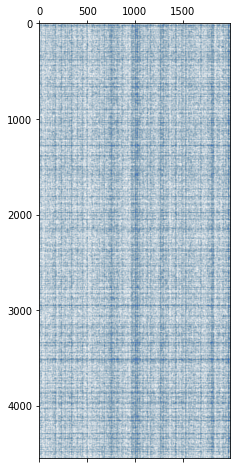

In [36]:
X, X.nnz
plt.figure(figsize=(10, 8))
plt.spy(X, markersize=0.01)
print(X.nnz, X.shape)

### Специальное SVD для разреженных матриц!

- Как вычислять SVD для плотных матриц было показано на лекции
- Однако у нас матрица разреженная!
- Для таких матриц обычно нужны не все сингулярные числа и вектора, а только первые $k \ll n$
- Для этого используются специальные алгоритмы!
- Пока же просто вызовём функцию из модуля ```scipy.sparse.linalg``` 

In [48]:
u, sigma, v = spsplin.svds(X.asfptype(), k=5)
print(u.shape, v.shape)

(4551, 5) (5, 2000)


### Посмотрим на убывание сингулярных чисел

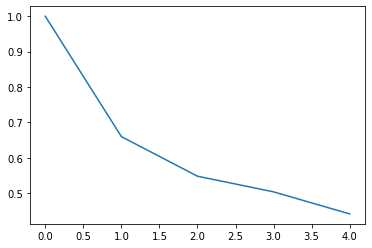

In [49]:
plt.plot(sigma[::-1]/sigma[-1])

In [50]:
terms = vectorizer.get_feature_names()
print(len(terms))
print(terms[:100])

2000
['ability', 'able', 'abortion', 'absolutely', 'abuse', 'academy', 'accept', 'access', 'according', 'account', 'accounts', 'accused', 'achieve', 'acting', 'action', 'actions', 'activity', 'actor', 'actors', 'actual', 'actually', 'adam', 'added', 'adding', 'additional', 'address', 'adds', 'administration', 'admitted', 'adult', 'advantage', 'advertising', 'advice', 'adviser', 'affairs', 'affect', 'affected', 'africa', 'african', 'afternoon', 'aged', 'agency', 'agenda', 'agree', 'agreed', 'agreement', 'ahead', 'alan', 'albion', 'album', 'alcohol', 'alex', 'allegations', 'alleged', 'allen', 'allow', 'allowed', 'allowing', 'allows', 'alongside', 'alternative', 'amazon', 'america', 'american', 'americans', 'amid', 'analysis', 'analyst', 'analysts', 'andrew', 'angeles', 'anger', 'angry', 'announced', 'announcement', 'annual', 'answer', 'anti', 'anxiety', 'apart', 'apparently', 'appeal', 'appear', 'appearance', 'appeared', 'appears', 'apple', 'apply', 'approach', 'appropriate', 'april', 'a

### Темы и "главные" слова для них

In [51]:
for i, comp in enumerate(v):
    print(comp.shape, np.linalg.norm(comp))
    terms_comp = zip(terms, comp)
    sorted_terms = sorted(terms_comp, key= lambda x: x[1], reverse=True)[:10]
    print("Topic "+str(i)+": ")
    for t in sorted_terms:
        print("Word: {}, score: {}".format(t[0], t[1]))

(2000,) 1.0000000000000002
Topic 0: 
Word: brexit, score: 0.2342967270095288
Word: britain, score: 0.17838272389393292
Word: referendum, score: 0.16499464574977188
Word: labour, score: 0.16009369956299713
Word: leave, score: 0.1598132228000775
Word: cameron, score: 0.1573817386905796
Word: vote, score: 0.1488837209824312
Word: party, score: 0.12235666375548367
Word: minister, score: 0.11181746174298263
Word: europe, score: 0.11060521274132529
(2000,) 0.9999999999999999
Topic 1: 
Word: league, score: 0.29868243779357134
Word: season, score: 0.20890441430202453
Word: leicester, score: 0.17713005723146955
Word: premier, score: 0.16494410070607168
Word: goal, score: 0.1553397509773867
Word: united, score: 0.15382786239448695
Word: liverpool, score: 0.13929011548718
Word: city, score: 0.1387893068775236
Word: players, score: 0.1353090340951121
Word: team, score: 0.13453644383344746
(2000,) 1.0000000000000007
Topic 2: 
Word: bank, score: 0.2586203501929616
Word: brexit, score: 0.201025356906

### Темы и "главные" документы для них

In [52]:
top_docs = np.argmax(u, axis=0)
print(top_docs)
for i, j in enumerate(top_docs):
    print("Topic {}".format(i))
    print(documents[j])
    print(" ")

[3179  957 1889 1130 4115]
Topic 0
Cameron names referendum date as Gove declares for Brexit – as it happened • David Cameron has called for his referendum on Britain’s membership of the EU to take place on 23 June, after the cabinet formally agreed to campaign to stay in despite several minister openly supporting Brexit. Speaking from outside Downing Street, the prime minister said he had secured a good deal with Brussels to give the UK a special status and leaving the EU would “threaten our economic and national security”. • Michael Gove has said that the European Union is encouraging extremism across Europe as he joined five other cabinet ministers in breaking ranks with David Cameron to campaign to take Britain out of the EU. The justice secretary, one of the prime minister’s closest political friends, posed for for a photo with his cabinet colleagues at the headquarters of the Vote Leave campaign group shortly after a rare Saturday cabinet meeting. • A marathon round of talks over

### Найдём по данному запросу ближайший документ

In [53]:
new_request_original = '''There were four minutes remaining and none of the Newcastle United fans had left. 
Even with their team a man down and four goals down, they stayed. 
Even with another reminder of how their well-intentioned manager, Steve Bruce, 
struggles to build on the good work of Rafa Benítez, 
they kept standing there, kept singing, defying the rain and the pain.'''

# removing everything except alphabets`
new_request = new_request_original.replace("[^a-zA-Z#]", " ")

# removing short words
new_request = ' '.join([w for w in new_request.split() if len(w)>3])

# make all text lowercase
new_request = new_request.lower()


# tokenization
tokenized_doc = new_request.split()

# remove stop-words
tokenized_doc = [item for item in tokenized_doc if item not in stop_words]

# de-tokenization
detokenized_request = ' '.join(tokenized_doc)

y = vectorizer.transform([detokenized_request]).toarray().T
y.shape, v.shape

((2000, 1), (5, 2000))

In [54]:
score = u @ (sigma[:, np.newaxis] * v.dot(y))
print(score.shape)
idx_best = np.argmax(score)
print(documents[idx_best])

(4551, 1)
Premier League: 10 things to look out for this weekend 1) Start of a tough run for the Hammers On the last day of the 2006-07 season Manchester United, who had won the title five days earlier, fielded a weakened side – Cristiano Ronaldo, Ryan Giggs, Paul Scholes, Rio Ferdinand and Nemanja Vidic were all left out of the starting XI – at Old Trafford against a West Ham team who needed at least a point to avoid relegation. Carlos Tevez, who was to join United a few weeks later, scored the only goal on the stroke of half-time. “They couldn’t have come to Old Trafford on a better day,” said Sir Alex Ferguson after the game. “We had already won the league and the edge was off our game.” There was also a 1-0 win in December 2001, against a wretchedly out-of-form United side that were completing a memorably horrific run of five defeats in seven league games. Those two games are the Hammers’ only highlights in a miserable run of top-flight visits to Old Trafford that now extends over 

In [55]:
print(sorted(score.ravel())[::-1][:10])

[0.15423287148863093, 0.1490149714974725, 0.14856256001251603, 0.1468145922868753, 0.14587747043814586, 0.14311659008791117, 0.14280430561212681, 0.14093236188385574, 0.14036136559193446, 0.13941241124378032]


## Приложение 2: рекомендательные системы

### Что дано?

- Матрица пользователь-продукт
- Элементы матрицы – рейтинги, если есть
- Неполное заполнение

## Как использовать SVD?

- Оригинальная работа [*Performance of recommender algorithms on top-n recommendation tasks*](https://dl.acm.org/citation.cfm?id=1864721), Cremonesi, P., Koren, Y., and Turrin, R
- Построим вложение пользователей и продуктов в некоторое подпространство $\mathbb{R}^n$
- Для известных предпочтений найдём наиболее близкие продукты в этом подпространстве
- Как это вычислительно сделать?

### Датасет Movielens с рейтингами фильмов

In [56]:
movies = pd.read_csv('movies.gz', index_col='movieid', header=0, encoding='unicode-escape')[['movienm', 'genreid']]
ratings = pd.read_csv('ratings.gz', header=0)

### Пример записей

In [57]:
movies.head()

,movienm,genreid
movieid,,
1,Toy Story (1995),"Animation, Children's, Comedy"
2,Jumanji (1995),"Adventure, Children's, Fantasy"
3,Grumpier Old Men (1995),"Comedy, Romance"
4,Waiting to Exhale (1995),"Comedy, Drama"
5,Father of the Bride Part II (1995),Comedy


In [58]:
ratings.head()

,userid,movieid,rating
0,1,1193,5
1,1,661,3
2,1,914,3
3,1,3408,4
4,1,2355,5


In [59]:
ratings[['userid', 'movieid']].apply(pd.Series.nunique)

userid     6040
movieid    3706
dtype: int64

### Зададим список предпочтений

In [72]:
best_movies = "Rain man|titanic"
target_movies = movies.loc[movies.movienm.str.contains(best_movies, flags=2)]
target_movies

,movienm,genreid
movieid,,
1721,Titanic (1997),"Drama, Romance"
1961,Rain Man (1988),Drama
2157,"Chambermaid on the Titanic, The (1998)",Romance
3403,Raise the Titanic (1980),"Drama, Thriller"
3404,Titanic (1953),"Action, Drama"


### Выделим индексы выбранных фильмов

In [73]:
favorite_movies_ids = target_movies.index
print(favorite_movies_ids)

Int64Index([1721, 1961, 2157, 3403, 3404], dtype='int64', name='movieid')


### Создадим матрицу с рейтингами 

In [74]:
data_matrix = spsp.csr_matrix((ratings.rating.values.astype('f8'), 
                               (ratings.userid.values, ratings.movieid.values)))
print(data_matrix.shape)

(6041, 3953)


### Вычислим SVD

In [82]:
rank = 100
_, S, Vt = spsplin.svds(data_matrix, k=rank, return_singular_vectors='vh')

### Посмотрим на убывание сингулярных чисел

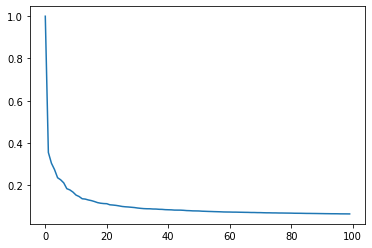

In [83]:
plt.plot(S[::-1] / S[-1])

### Получим корреляции

In [84]:
print(Vt[:, favorite_movies_ids].shape)
correlation = Vt.T @ Vt[:, favorite_movies_ids]
print(correlation.shape)
score = correlation.sum(axis=1)
print(score.shape)
# movies.loc[np.argsort(-Vt.T @ Vt[:, favorite_movies_ids].sum(axis=1))[:15]] # assuming binary preference vector

(100, 5)
(3953, 5)
(3953,)


### Вычислим итоговые рекомендации

In [86]:
top_n = 20
print(np.sort(score)[::-1][:top_n])
movies.loc[np.argsort(-score)[:top_n]]

[0.28297314 0.25370767 0.11244378 0.10362965 0.09288639 0.09181771
 0.09151313 0.0871552  0.07771316 0.07532924 0.071298   0.06988105
 0.0580853  0.05644277 0.05603836 0.05603375 0.05601621 0.05352738
 0.04998805 0.0497885 ]


,movienm,genreid
movieid,,
1961,Rain Man (1988),Drama
1721,Titanic (1997),"Drama, Romance"
1246,Dead Poets Society (1989),Drama
356,Forrest Gump (1994),"Comedy, Romance, War"
1393,Jerry Maguire (1996),"Drama, Romance"
2628,Star Wars: Episode I - The Phantom Menace (1999),"Action, Adventure, Fantasy, Sci-Fi"
1302,Field of Dreams (1989),Drama
1962,Driving Miss Daisy (1989),Drama
480,Jurassic Park (1993),"Action, Adventure, Sci-Fi"


### Обобщения 

- Учёт контекста позволяет внести в скалярное произведение матрицу похожести. Получим гибридную модель SVD, подробности в [этой работе](https://arxiv.org/pdf/1802.06398.pdf)
- Обзор использования нейронных сетей в рекомендательных системах можно найти [тут](https://arxiv.org/pdf/1707.07435.pdf): неочевидные преимущества по сравнению с моделями, основанными на матричных разложениях
-  [Блог про рекомендательные системы](https://www.eigentheories.com/archive.html#)